LETTER RECOGNITION DATABASE
- Fillipe de Menezes
- Jullya Clemente
- João Adherval
- Victor Martins

In [0]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

letter_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
names = ["lettr", "x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar", "x2bar", 
         "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"]
letter_data = pd.read_csv(letter_url, names=names)

*SOBRE A DATABASE*

The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. 


*ATRIBUTOS*

1. letter capital letter (26 values from A to Z)
2. x-box horizontal position of box (integer)
3. y-box vertical position of box (integer)
4. width width of box (integer)
5. high height of box (integer)
6. onpix total # on pixels (integer)
7. x-bar mean x of on pixels in box (integer)
8. y-bar mean y of on pixels in box (integer)
9. x2bar mean x variance (integer)
10. y2bar mean y variance (integer)
11. xybar mean x y correlation (integer)
12. x2ybr mean of x * x * y (integer)
13. xy2br mean of x * y * y (integer)
14. x-ege mean edge count left to right (integer)
15. xegvy correlation of x-ege with y (integer)
16. y-ege mean edge count bottom to top (integer)
17. yegvx correlation of y-ege with x (integer)

In [0]:
### Parametros
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})

In [0]:
letter_data.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [0]:
letter_data.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [0]:
letter_data.shape

(20000, 17)

In [0]:
letter_data.groupby('lettr').size()

lettr
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
dtype: int64

In [0]:
letter_data.dtypes

lettr    object
x-box     int64
y-box     int64
width     int64
high      int64
onpix     int64
x-bar     int64
y-bar     int64
x2bar     int64
y2bar     int64
xybar     int64
x2ybr     int64
xy2br     int64
x-ege     int64
xegvy     int64
y-ege     int64
yegvx     int64
dtype: object

In [0]:
letter_data.isnull().sum()

lettr    0
x-box    0
y-box    0
width    0
high     0
onpix    0
x-bar    0
y-bar    0
x2bar    0
y2bar    0
xybar    0
x2ybr    0
xy2br    0
x-ege    0
xegvy    0
y-ege    0
yegvx    0
dtype: int64

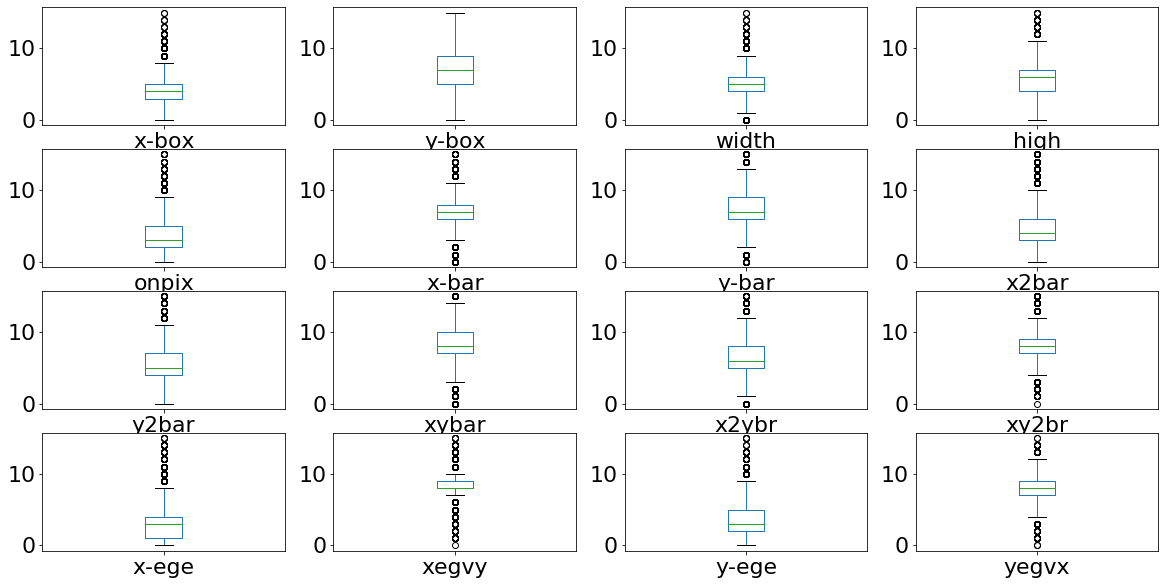

In [0]:
letter_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

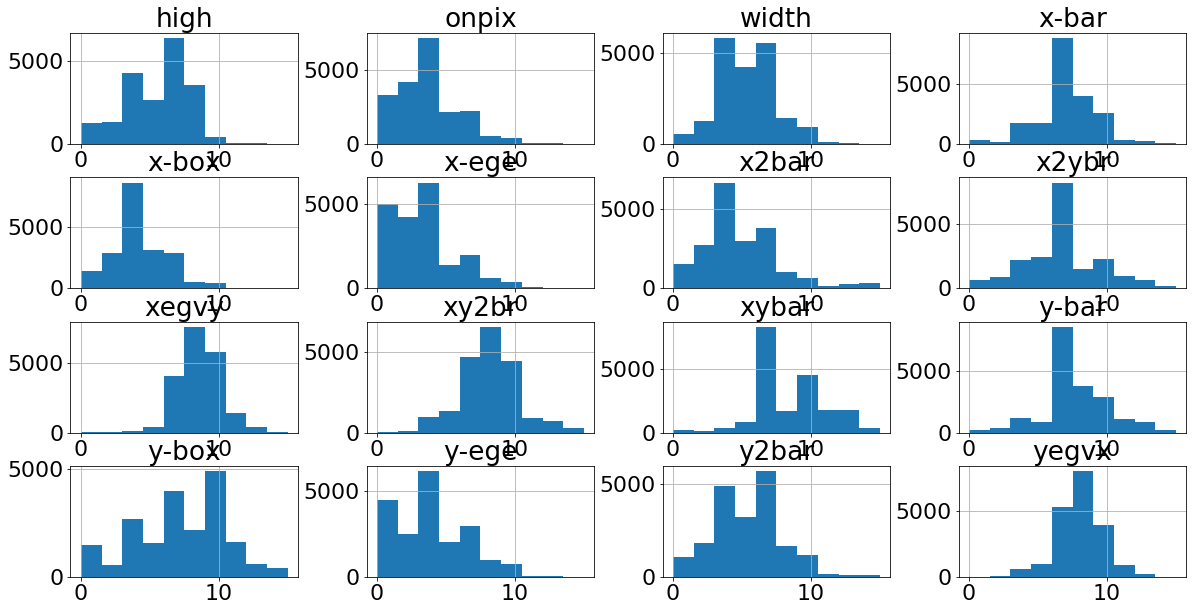

In [0]:
letter_data.hist()
plt.show()

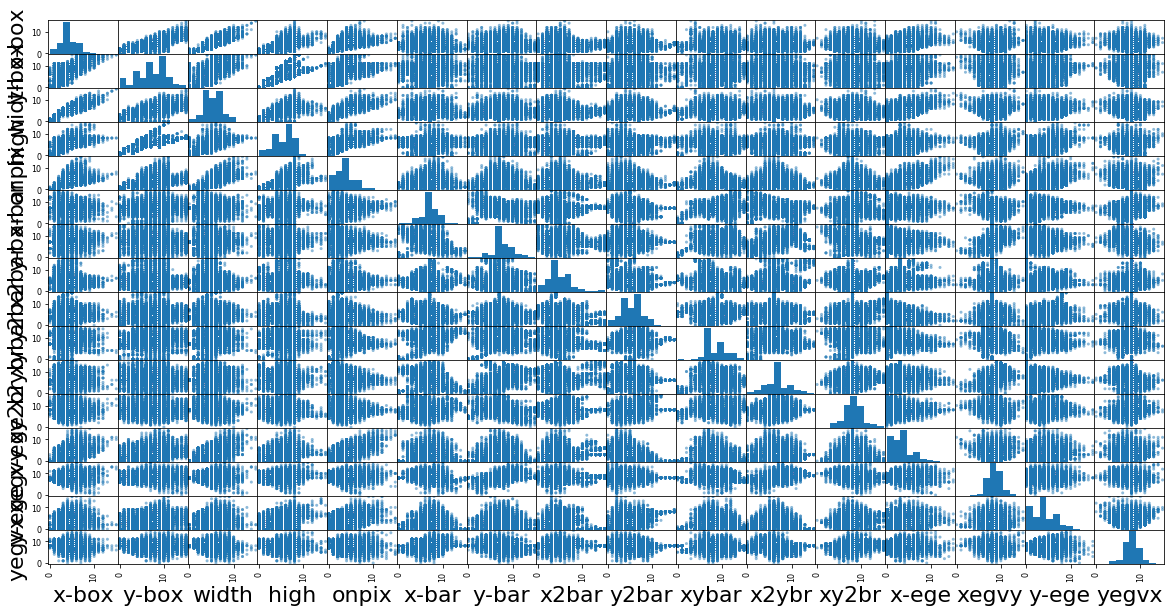

In [0]:
scatter_matrix(letter_data)
plt.show()

<BarContainer object of 26 artists>

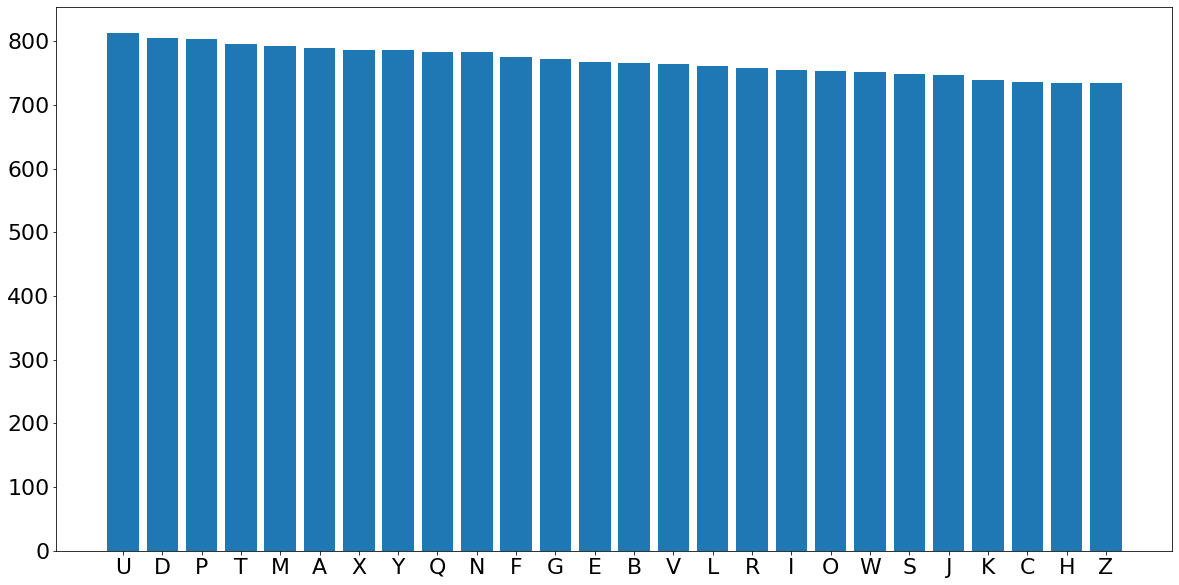

In [0]:
dist = letter_data['lettr'].value_counts()
plt.bar(dist.index, dist.values)

In [0]:
def group_by(df, col_name, target_name):
    """
    Agrupa os valores pela media e std em relação a classe alvo
    """
    df_tmp = df[[target_name, col_name]]
    groupby = df_tmp.groupby([target_name])

    mean = groupby.mean()
    std = groupby.std()
    
    return mean[col_name], std[col_name]

def plot(mean, std, title, xlabel):
    """
    plot bar htaph with mean and std
    """
    fig, ax = plt.subplots(1)
    # plot
    ax.bar(mean.index, mean.values, yerr=std, align='center', alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel(xlabel)

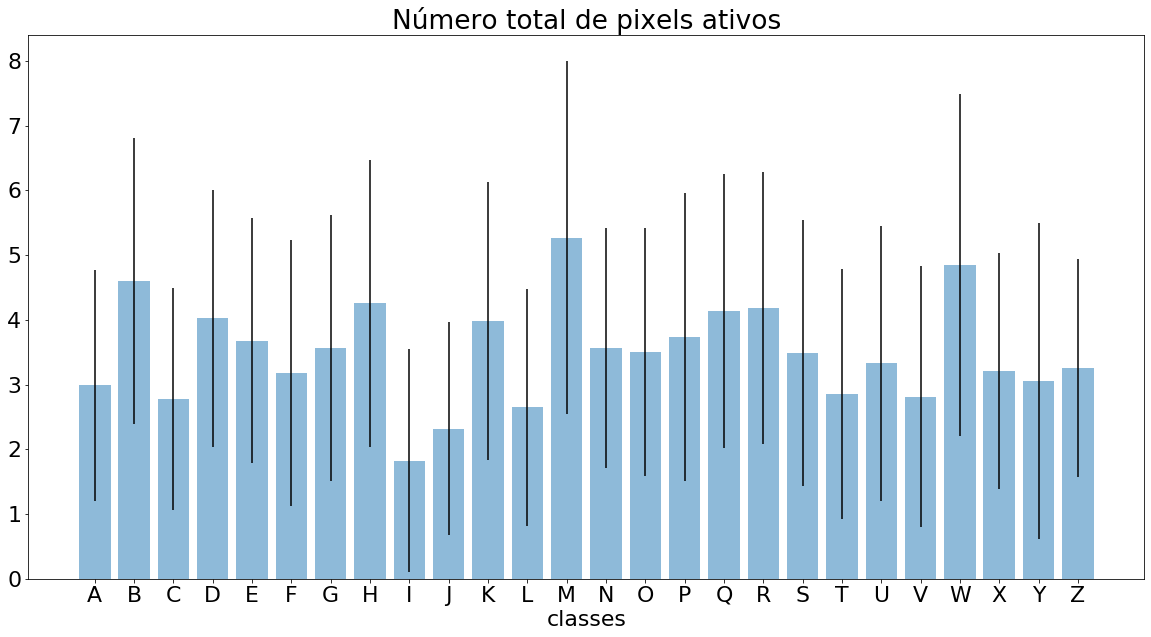

In [0]:
mean, std = group_by(letter_data, "onpix", "lettr")

plot(mean, std, "Número total de pixels ativos", "classes")

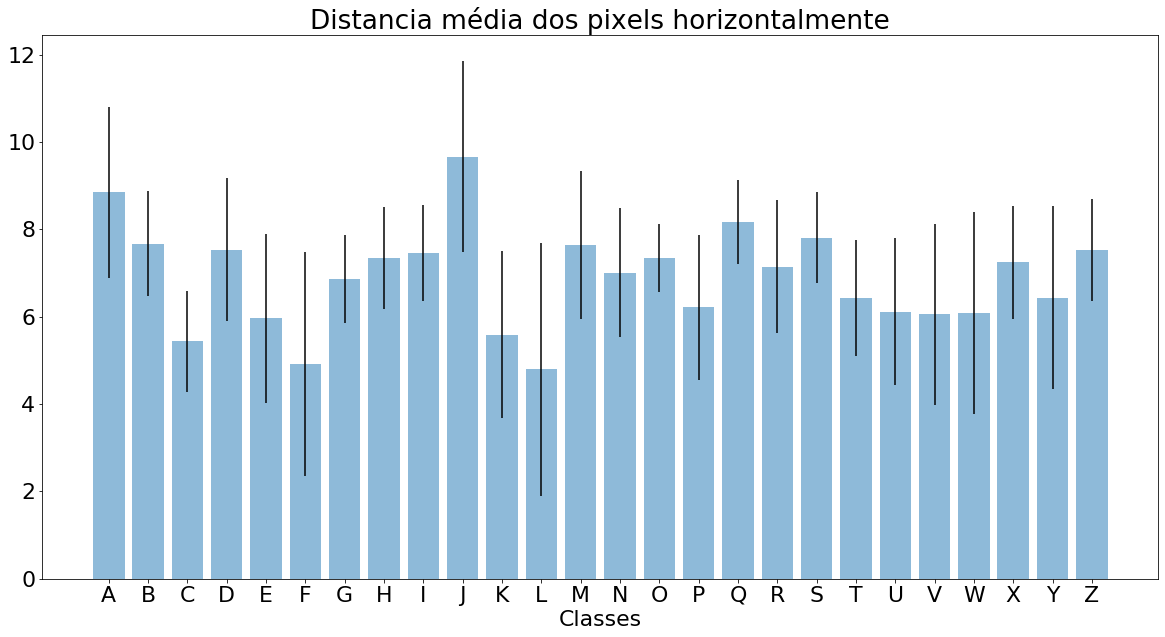

In [0]:
mean, std = group_by(letter_data, "x-bar", "lettr")

plot(mean, std, "Distancia média dos pixels horizontalmente", "Classes")

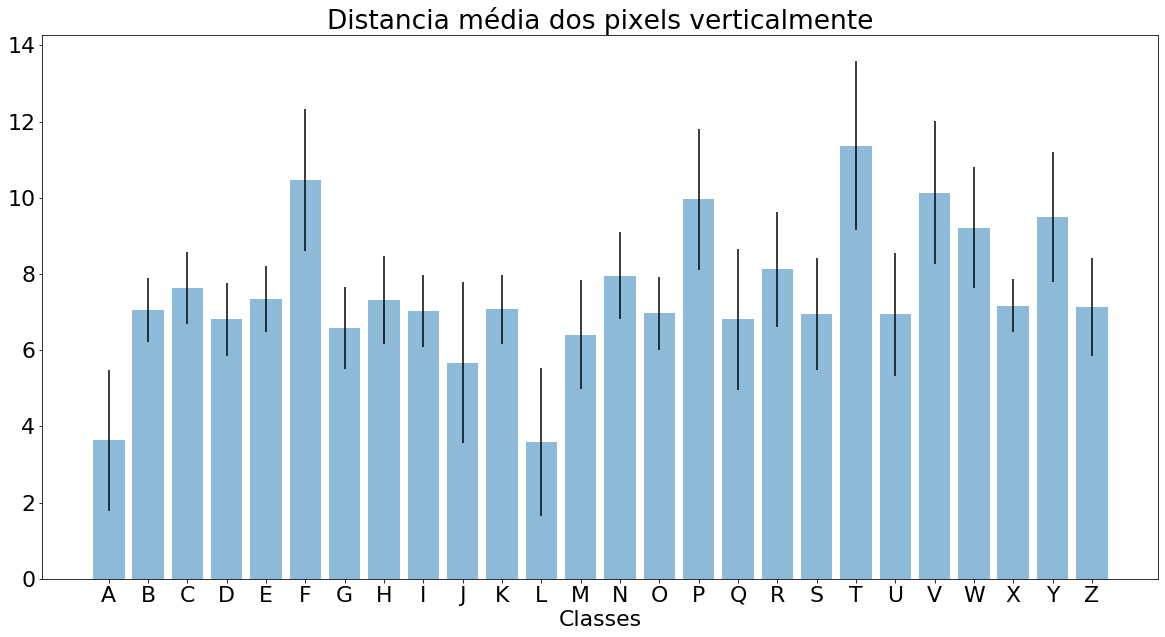

In [0]:
mean, std = group_by(letter_data, "y-bar", "lettr")

plot(mean, std, "Distancia média dos pixels verticalmente", "Classes")

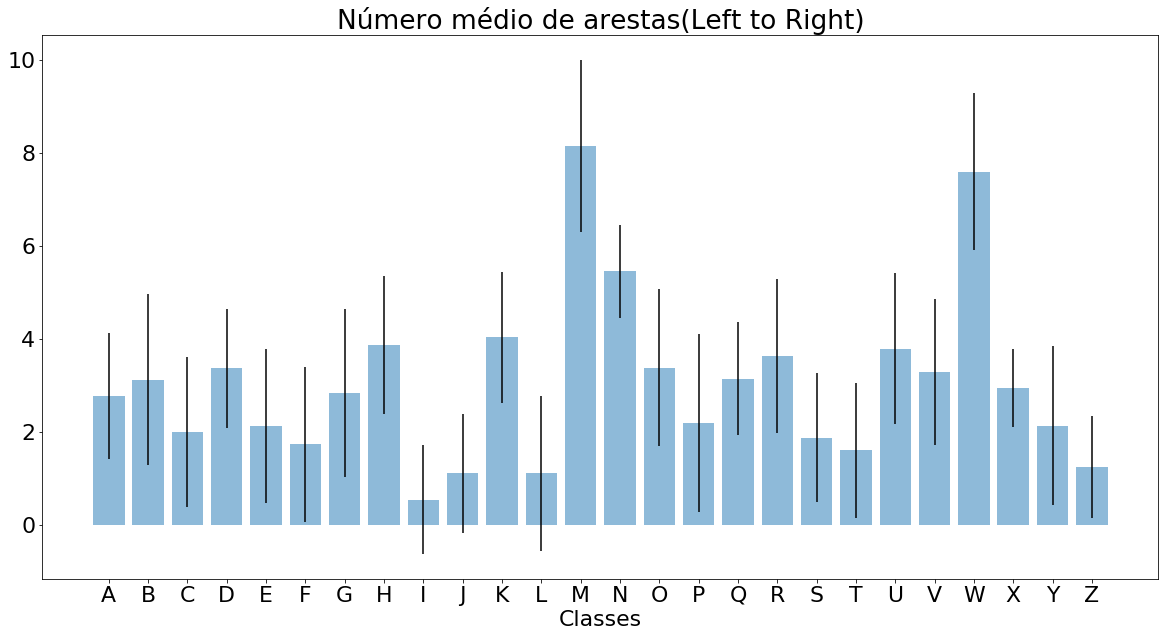

In [0]:
mean, std = group_by(letter_data, "x-ege", "lettr")

plot(mean, std, "Número médio de arestas(Left to Right)", "Classes")
#(um pixel "ativado" imediatamente à direita de um pixel "desativado" ou o limite da imagem)

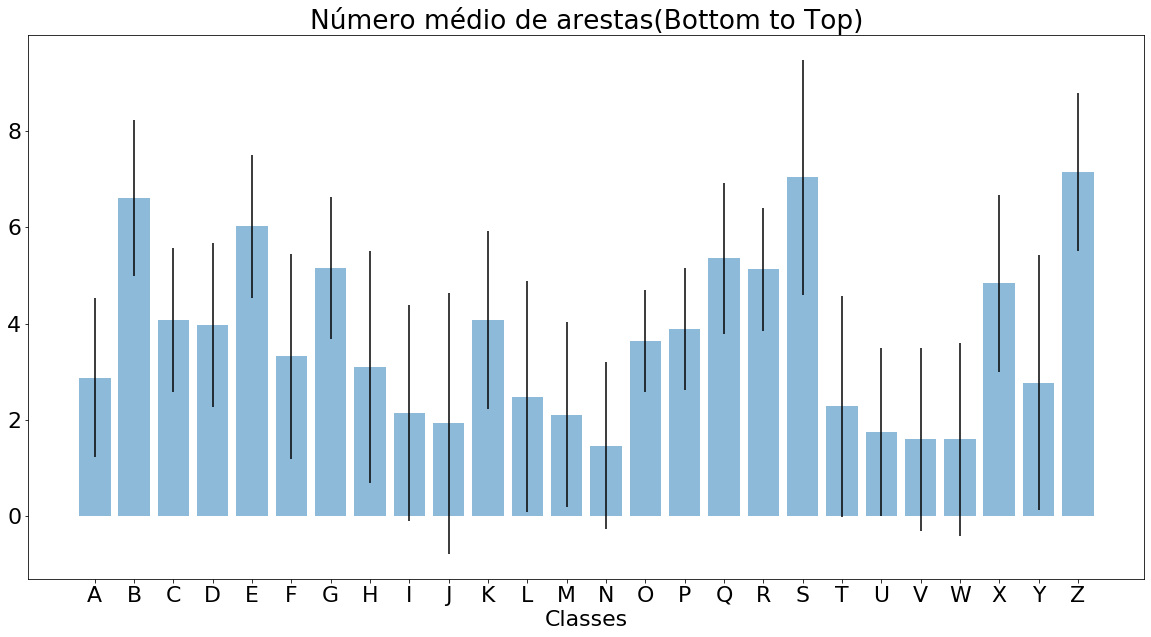

In [0]:
mean, std = group_by(letter_data, "y-ege", "lettr")

plot(mean, std, "Número médio de arestas(Bottom to Top)", "Classes")
#(um pixel "ligado" imediatamente acima de um pixel "desligado" ou o limite da imagem)

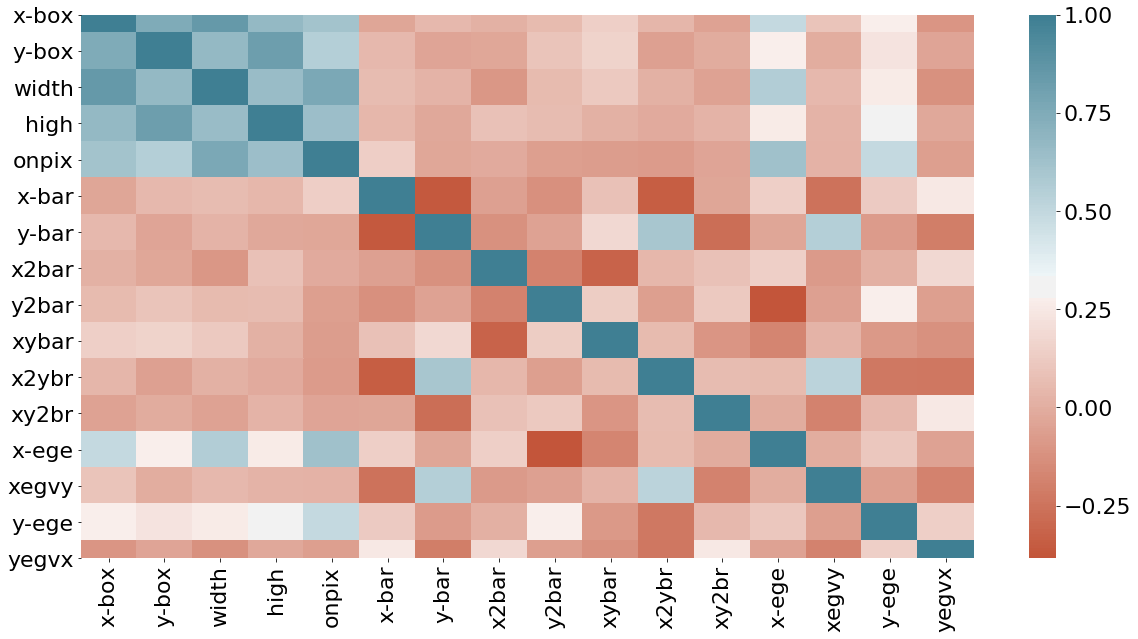

In [0]:
corr = letter_data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = letter_data.drop(["lettr"], axis=1)
Y = letter_data['lettr']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [0]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [7]:
fs = ExtraTreesClassifier(n_estimators=50)
fs = fs.fit(X, Y)
print("feature importances")
print(fs.feature_importances_)

feature importances
[0.02329155 0.02460833 0.02574762 0.02120486 0.0287913  0.05627338
 0.07002034 0.0907955  0.08892545 0.07300764 0.08050486 0.08203774
 0.10303533 0.0726027  0.10229255 0.05686084]


In [0]:
# feature selection
model = SelectFromModel(fs, prefit=True)
# features
feature_idx = model.get_support()
feature_name = X.columns[feature_idx]
# transform
# X_tmp = model.transform(X)
# X_new = pd.DataFrame(X_tmp, columns=feature_name)
X_tmp = model.transform(X)
X_new = pd.DataFrame(X_tmp, columns=feature_name)
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.3)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [0]:
#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree = DecisionTreeClassifier(random_state=42)
all_accuracies = cross_val_score(estimator=tree, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.8616991805741113
0.00960688325154441


In [0]:
#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree1 = DecisionTreeClassifier(criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=tree1, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.8713545134163232
0.008261210377054668


In [0]:
#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree2 = DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=42)
all_accuracies = cross_val_score(estimator=tree2, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.8425021297572926
0.011107552454369748


In [0]:
#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree3 = DecisionTreeClassifier(criterion='entropy', splitter='best', presort=True, random_state=42)
all_accuracies = cross_val_score(estimator=tree3, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.8713545134163232
0.008261210377054668


In [0]:
#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree4 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=1, presort=True, random_state=42)
all_accuracies = cross_val_score(estimator=tree4, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.7052387411539064
0.01592438982326325


In [0]:
#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree5 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=16, presort=True, random_state=42)
all_accuracies = cross_val_score(estimator=tree5, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.8713545134163232
0.008261210377054668


In [0]:
#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree6 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=10, presort=True, random_state=42)
all_accuracies = cross_val_score(estimator=tree6, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.8647825597012375
0.008155808757664295


In [0]:
#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree7 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=5, presort=True, random_state=42)
all_accuracies = cross_val_score(estimator=tree7, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.8362971066397238
0.006534379763975517


In [0]:
#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree8 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=12, presort=True, random_state=42)
all_accuracies = cross_val_score(estimator=tree8, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.8677196774157802
0.008854169069250663


In [0]:
#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree7 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=6, presort=True, random_state=42)
all_accuracies = cross_val_score(estimator=tree7, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.8472805125738139
0.008159742000538458


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier()
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9355875625903675
0.006148387171077854


In [0]:
# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(weights='distance')
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9429397382605436
0.005957506565435702


In [0]:
# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(weights='distance', metric='minkowski')
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9429397382605436
0.005957506565435702


In [0]:
# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.947792769155539
0.004575349781522972


In [0]:
# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(weights='distance', metric='minkowski', p=2)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9429397382605436
0.005957506565435702


In [0]:
# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(weights='distance', metric='minkowski', p=3)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9347176105601518
0.005576863868794658


In [0]:
# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9432068211132443
0.004650519420208766


In [0]:
# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(n_neighbors=25, weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9274894113669934
0.0069676957632472105


In [0]:
# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(n_neighbors=50, weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9108600877721248
0.00721636285832359


In [0]:
# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9480805666734178
0.00610571043979423


In [0]:
# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.945995461729682
0.004531534606693879


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
forest = RandomForestClassifier(n_estimators=10, random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9264266684108181
0.004617084784730608


In [0]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9285080001428623
0.004293540570465452


In [0]:
forest = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9467032792671132
0.003565901924363519


In [0]:
forest = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9552822068041327
0.0032358571753485035


In [0]:
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9594302335075937
0.0033785619212400625


In [0]:
forest = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9597195589402837
0.002832384329326309


In [0]:
forest = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9597144984569393
0.0034789150366781934


In [0]:
forest = RandomForestClassifier(n_estimators=250, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9605732446261346
0.0025752085723942815


In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
mlp = MLPClassifier(random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.9452183134062944
0.006098950000338101


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='identity', random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.7667897964874365
0.011283782892628947


In [0]:
mlp = MLPClassifier(activation='logistic', random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.9220572573048369
0.00933385245518607


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='tanh', random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.946348233281836
0.0023112367092343322


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='tanh', solver='lbfgs', random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.9309334947250779
0.007134918046432656


In [0]:
mlp = MLPClassifier(activation='tanh', solver='sgd', random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.7991410519993092
0.012168353339570693


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='tanh', solver='sgd', learning_rate='invscaling' , random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.16551246986217344
0.007078543693019354


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='tanh', solver='sgd', learning_rate='adaptive' , random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.7991410519993092
0.012168353339570693


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='tanh', solver='adam', shuffle=False, random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.9482048633674685
0.005065953646594372


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
from sklearn.ensemble import BaggingClassifier

In [0]:
tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=16, presort=True, random_state=42)
knn = KNeighborsClassifier(weights='distance', metric='minkowski', p=1)
forest = RandomForestClassifier(n_estimators=250, criterion='entropy', random_state=42)
mlp = MLPClassifier(activation='tanh', solver='adam', shuffle=False, random_state=42)
clf_array = [tree, knn, forest, mlp]
for clf in clf_array:
    pima_scores = cross_val_score(clf, X_train, Y_train, cv=10)
    bagging_clf = BaggingClassifier(clf,max_samples=0.8, random_state=42)
    bagging_scores = cross_val_score(bagging_clf, X_train, Y_train, cv=10)    
    print('Media clf ',pima_scores.mean(), 'Desvio ',pima_scores.std(), 'Media Bagging',bagging_scores.mean(), 'Desvio ',bagging_scores.std())

Media clf  0.8713545134163232 Desvio  0.008261210377054668 Media Bagging 0.9133561918346416 Desvio  0.005063989118391135
Media clf  0.947792769155539 Desvio  0.004575349781522972 Media Bagging 0.9449278365115024 Desvio  0.005393716017738339
Media clf  0.9605732446261346 Desvio  0.0025752085723942815 Media Bagging 0.9518588741694838 Desvio  0.0034412864114303746


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

Media clf  0.9482048633674685 Desvio  0.005065953646594372 Media Bagging 0.9537208926690368 Desvio  0.005087985016787884


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=6, presort=True, random_state=42)
forest = RandomForestClassifier(n_estimators=250, criterion='entropy', random_state=42)
clf_array = [tree, forest]
for clf in clf_array:
    pima_scores = cross_val_score(clf, X_train, Y_train, cv=10)
    boosting_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=15, random_state=42)
    boosting_scores = cross_val_score(boosting_clf, X_train, Y_train, cv=10)    
    print('Media clf ',pima_scores.mean(), 'Desvio ',pima_scores.std(), 'Media Bagging',boosting_scores.mean(), 'Desvio ',boosting_scores.std())

Media clf  0.8649286485267599 Desvio  0.00706523642505908 Media Bagging 0.9310038469862245 Desvio  0.007456134589909478
Media clf  0.9395763684365305 Desvio  0.0024802835715788956 Media Bagging 0.9323683133934655 Desvio  0.005308196844331252


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [0]:
tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=16, presort=True, random_state=42)
tree = tree.fit(X_train, Y_train)

Y_test_prediction = tree.predict(X_test)

print("Clasification report:", classification_report(Y_test, Y_test_prediction))
print("Confussion matrix:", confusion_matrix(Y_test, Y_test_prediction))

Clasification report:               precision    recall  f1-score   support

           A       0.95      0.93      0.94       230
           B       0.78      0.84      0.81       226
           C       0.88      0.85      0.87       228
           D       0.85      0.85      0.85       253
           E       0.86      0.86      0.86       219
           F       0.82      0.81      0.81       213
           G       0.83      0.81      0.82       267
           H       0.78      0.80      0.79       219
           I       0.89      0.91      0.90       218
           J       0.93      0.89      0.91       235
           K       0.86      0.88      0.87       201
           L       0.93      0.93      0.93       217
           M       0.95      0.93      0.94       250
           N       0.87      0.88      0.87       228
           O       0.80      0.89      0.84       229
           P       0.86      0.87      0.86       218
           Q       0.86      0.83      0.84       240
     

In [0]:
knn = KNeighborsClassifier(weights='distance', metric='minkowski', p=1)
knn = knn.fit(X_train, Y_train)

Y_test_prediction = knn.predict(X_test)

print("Clasification report:", classification_report(Y_test, Y_test_prediction))
print("Confussion matrix:", confusion_matrix(Y_test, Y_test_prediction))

Clasification report:               precision    recall  f1-score   support

           A       0.98      0.99      0.99       230
           B       0.91      0.95      0.93       226
           C       0.98      0.93      0.95       228
           D       0.93      0.98      0.95       253
           E       0.91      0.95      0.93       219
           F       0.95      0.92      0.93       213
           G       0.95      0.95      0.95       267
           H       0.91      0.88      0.89       219
           I       0.95      0.98      0.96       218
           J       0.98      0.94      0.96       235
           K       0.91      0.91      0.91       201
           L       0.98      0.97      0.98       217
           M       0.98      0.95      0.97       250
           N       0.98      0.91      0.95       228
           O       0.94      0.96      0.95       229
           P       0.95      0.97      0.96       218
           Q       0.94      0.96      0.95       240
     

In [0]:
forest = RandomForestClassifier(n_estimators=250, criterion='entropy', random_state=42)
forest = forest.fit(X_train, Y_train)

Y_test_prediction = forest.predict(X_test)

print("Clasification report:", classification_report(Y_test, Y_test_prediction))
print("Confussion matrix:", confusion_matrix(Y_test, Y_test_prediction))

Clasification report:               precision    recall  f1-score   support

           A       0.99      1.00      1.00       230
           B       0.90      0.97      0.93       226
           C       0.99      0.93      0.96       228
           D       0.94      0.97      0.96       253
           E       0.96      0.95      0.96       219
           F       0.95      0.93      0.94       213
           G       0.94      0.96      0.95       267
           H       0.96      0.90      0.93       219
           I       0.96      0.97      0.96       218
           J       0.98      0.94      0.96       235
           K       0.95      0.94      0.95       201
           L       1.00      0.97      0.98       217
           M       0.96      0.97      0.96       250
           N       0.96      0.94      0.95       228
           O       0.94      0.96      0.95       229
           P       0.98      0.98      0.98       218
           Q       0.93      0.97      0.95       240
     

In [0]:
mlp = MLPClassifier(activation='tanh', solver='adam', shuffle=False, random_state=42)
mlp = mlp.fit(X_train, Y_train)

Y_test_prediction = mlp.predict(X_test)

print("Clasification report:", classification_report(Y_test, Y_test_prediction))
print("Confussion matrix:", confusion_matrix(Y_test, Y_test_prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Clasification report:               precision    recall  f1-score   support

           A       0.99      0.97      0.98       230
           B       0.90      0.95      0.92       226
           C       0.97      0.93      0.95       228
           D       0.95      0.96      0.96       253
           E       0.90      0.93      0.92       219
           F       0.92      0.92      0.92       213
           G       0.94      0.92      0.93       267
           H       0.91      0.86      0.89       219
           I       0.92      0.95      0.94       218
           J       0.94      0.94      0.94       235
           K       0.93      0.96      0.94       201
           L       0.97      0.95      0.96       217
           M       0.97      0.96      0.97       250
           N       0.94      0.96      0.95       228
           O       0.91      0.98      0.95       229
           P       0.97      0.94      0.95       218
           Q       0.95      0.96      0.95       240
     

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree = DecisionTreeClassifier(random_state=42)
all_accuracies = cross_val_score(estimator=tree, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree1 = DecisionTreeClassifier(criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=tree1, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree2 = DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=42)
all_accuracies = cross_val_score(estimator=tree2, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree3 = DecisionTreeClassifier(criterion='entropy', splitter='best', presort=True, random_state=42)
all_accuracies = cross_val_score(estimator=tree3, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree4 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=1, presort=True, random_state=42)
all_accuracies = cross_val_score(estimator=tree4, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
# tree5 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=16, presort=True, random_state=42)
# all_accuracies = cross_val_score(estimator=tree5, X=X_train, y=Y_train, cv=10)
# print(all_accuracies.mean())
# print(all_accuracies.std())

#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
# tree6 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=10, presort=True, random_state=42)
# all_accuracies = cross_val_score(estimator=tree6, X=X_train, y=Y_train, cv=10)
# print(all_accuracies.mean())
# print(all_accuracies.std())

#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree7 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=5, presort=True, random_state=42)
all_accuracies = cross_val_score(estimator=tree7, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
# tree8 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=12, presort=True, random_state=42)
# all_accuracies = cross_val_score(estimator=tree8, X=X_train, y=Y_train, cv=10)
# print(all_accuracies.mean())
# print(all_accuracies.std())

#parameters={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2], 'max_features': range(1,len(names)), 'presort': [True, False]}
tree7 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_features=6, presort=True, random_state=42)
all_accuracies = cross_val_score(estimator=tree7, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

from sklearn.neighbors import KNeighborsClassifier

# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier()
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(weights='distance')
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(weights='distance', metric='minkowski')
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(weights='distance', metric='minkowski', p=2)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(weights='distance', metric='minkowski', p=3)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(n_neighbors=25, weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(n_neighbors=50, weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

# parameters={'n_neighbors': range(1, 100, 10), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1,2,3]}
knn = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='minkowski', p=1)
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10, random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

forest = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

forest = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

forest = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

forest = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

forest = RandomForestClassifier(n_estimators=250, criterion='entropy', random_state=42)
all_accuracies = cross_val_score(estimator=forest, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.8628706650383983
0.009227085138188124
0.8672291988446629
0.008892326607239242
0.849809515481579
0.011716869343647218
0.8672291988446629
0.008892326607239242
0.8095292614849738
0.010237597205059222
0.8577070925046927
0.006871989692803445
0.8634402825694825
0.006938397711036805
0.939139119665754
0.008561951631816257
0.9440737048461376
0.006754940057808257
0.9440737048461376
0.006754940057808257
0.9438594824109112
0.008002629766473292
0.9440737048461376
0.006754940057808257
0.9424310670865319
0.007139505846121543
0.9384251659446952
0.006798908385133415
0.9223595496273349
0.004746995821787809
0.905998298188887
0.004282331109529477
0.9429351456480995
0.009201561555736792
0.9411379121327877
0.007493709199204901
0.9173776377233349
0.006872892692701194
0.9157126601864277
0.006792306328545587
0.9267823060534731
0.006801442631086742
0.9343690522432366
0.005355382773608715
0.9382961194381354
0.007546239410488782
0.9379349002387437
0.00678884494803373
0.9380793195694788
0.006989990173930198
0.93

In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.8687842377909133
0.00829427152433031


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='identity', random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.6852923117293802
0.01309931065870747


In [0]:
mlp = MLPClassifier(activation='logistic', random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.8543937251281761
0.009191346341381515


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='tanh', random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.8846929452250378
0.005399781114396261


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='tanh', solver='lbfgs', random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

0.8440758313131642
0.0056731186922388465


In [0]:
mlp = MLPClassifier(activation='tanh', solver='sgd', random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.786806863939111
0.00738802215407004


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='tanh', solver='sgd', learning_rate='invscaling' , random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.22487654936532872
0.00763957514495922


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='tanh', solver='sgd', learning_rate='adaptive' , random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.786806863939111
0.00738802215407004


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
mlp = MLPClassifier(activation='tanh', solver='adam', shuffle=False, random_state=42)
all_accuracies = cross_val_score(estimator=mlp, X=X_train, y=Y_train, cv=10)
print(all_accuracies.mean())
print(all_accuracies.std())

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

0.8847856827337092
0.006990735168578679


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
from sklearn.ensemble import BaggingClassifier

In [0]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
knn = KNeighborsClassifier(weights='distance', metric='minkowski', p=2)
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
mlp = MLPClassifier(activation='tanh', solver='adam', shuffle=False, random_state=42)

clf_array = [tree, knn, forest, mlp]
for clf in clf_array:
    pima_scores = cross_val_score(clf, X_train, Y_train, cv=10)
    bagging_clf = BaggingClassifier(clf,max_samples=0.8, random_state=42)
    bagging_scores = cross_val_score(bagging_clf, X_train, Y_train, cv=10)    
    print('Media clf ',pima_scores.mean(), 'Desvio ',pima_scores.std(), 'Media Bagging',bagging_scores.mean(), 'Desvio ',bagging_scores.std())

Media clf  0.8672291988446629 Desvio  0.008892326607239242 Media Bagging 0.900067957071203 Desvio  0.006177154856481868
Media clf  0.9440737048461376 Desvio  0.006754940057808257 Media Bagging 0.9421504745688427 Desvio  0.005731223297919939
Media clf  0.9382961194381354 Desvio  0.007546239410488782 Media Bagging 0.9329232337663524 Desvio  0.0070373130765652905


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

Media clf  0.8847856827337092 Desvio  0.006990735168578679 Media Bagging 0.894483828102057 Desvio  0.007505312532118955


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

clf_array = [tree, forest]
for clf in clf_array:
    pima_scores = cross_val_score(clf, X_train, Y_train, cv=10)
    boosting_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=15, random_state=42)
    boosting_scores = cross_val_score(boosting_clf, X_train, Y_train, cv=10)    
    print('Media clf ',pima_scores.mean(), 'Desvio ',pima_scores.std(), 'Media Boosting',boosting_scores.mean(), 'Desvio ',boosting_scores.std())

Media clf  0.8710855282454769 Desvio  0.01063901292608154 Media Boosting 0.8880256733908043 Desvio  0.01422517825903439
Media clf  0.9387974428027324 Desvio  0.004417511029108309 Media Boosting 0.9398124421289223 Desvio  0.007333299970592601


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree = tree.fit(X_train, Y_train)

Y_test_prediction = tree.predict(X_test)

print("Clasification report:", classification_report(Y_test, Y_test_prediction))
print("Confussion matrix:", confusion_matrix(Y_test, Y_test_prediction))

Clasification report:               precision    recall  f1-score   support

           A       0.96      0.94      0.95       262
           B       0.78      0.83      0.80       224
           C       0.92      0.88      0.90       223
           D       0.82      0.84      0.83       256
           E       0.82      0.87      0.85       223
           F       0.87      0.80      0.83       221
           G       0.81      0.83      0.82       219
           H       0.81      0.81      0.81       215
           I       0.88      0.92      0.90       238
           J       0.92      0.87      0.89       238
           K       0.83      0.83      0.83       240
           L       0.94      0.92      0.93       232
           M       0.93      0.89      0.91       260
           N       0.88      0.93      0.90       197
           O       0.81      0.80      0.81       224
           P       0.89      0.87      0.88       244
           Q       0.82      0.84      0.83       227
     

In [27]:
knn = KNeighborsClassifier(weights='distance', metric='minkowski', p=2)
knn = knn.fit(X_train, Y_train)

Y_test_prediction = knn.predict(X_test)

print("Clasification report:", classification_report(Y_test, Y_test_prediction))
print("Confussion matrix:", confusion_matrix(Y_test, Y_test_prediction))


Clasification report:               precision    recall  f1-score   support

           A       0.98      1.00      0.99       262
           B       0.86      0.96      0.91       224
           C       0.98      0.96      0.97       223
           D       0.91      0.95      0.93       256
           E       0.94      0.95      0.94       223
           F       0.92      0.94      0.93       221
           G       0.94      0.92      0.93       219
           H       0.86      0.85      0.86       215
           I       0.95      0.94      0.95       238
           J       0.96      0.92      0.94       238
           K       0.95      0.87      0.91       240
           L       0.98      0.95      0.97       232
           M       0.98      0.98      0.98       260
           N       0.98      0.94      0.96       197
           O       0.94      0.90      0.92       224
           P       0.97      0.92      0.94       244
           Q       0.90      0.92      0.91       227
     

In [28]:
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
forest = forest.fit(X_train, Y_train)

Y_test_prediction = forest.predict(X_test)

print("Clasification report:", classification_report(Y_test, Y_test_prediction))
print("Confussion matrix:", confusion_matrix(Y_test, Y_test_prediction))

Clasification report:               precision    recall  f1-score   support

           A       0.99      1.00      0.99       262
           B       0.86      0.93      0.89       224
           C       0.97      0.95      0.96       223
           D       0.93      0.94      0.93       256
           E       0.93      0.93      0.93       223
           F       0.91      0.93      0.92       221
           G       0.94      0.95      0.94       219
           H       0.90      0.87      0.89       215
           I       0.93      0.94      0.94       238
           J       0.96      0.92      0.94       238
           K       0.95      0.93      0.94       240
           L       0.99      0.94      0.96       232
           M       0.98      0.98      0.98       260
           N       0.97      0.95      0.96       197
           O       0.92      0.92      0.92       224
           P       0.95      0.93      0.94       244
           Q       0.90      0.92      0.91       227
     

In [29]:
mlp = MLPClassifier(activation='tanh', solver='adam', shuffle=False, random_state=42)
mlp = mlp.fit(X_train, Y_train)

Y_test_prediction = mlp.predict(X_test)

print("Clasification report:", classification_report(Y_test, Y_test_prediction))
print("Confussion matrix:", confusion_matrix(Y_test, Y_test_prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Clasification report:               precision    recall  f1-score   support

           A       0.95      0.95      0.95       262
           B       0.67      0.88      0.76       224
           C       0.97      0.90      0.93       223
           D       0.90      0.83      0.86       256
           E       0.87      0.90      0.88       223
           F       0.89      0.88      0.89       221
           G       0.83      0.90      0.86       219
           H       0.79      0.75      0.77       215
           I       0.92      0.92      0.92       238
           J       0.94      0.89      0.91       238
           K       0.90      0.83      0.86       240
           L       0.98      0.91      0.94       232
           M       0.97      0.98      0.98       260
           N       0.94      0.92      0.93       197
           O       0.80      0.87      0.83       224
           P       0.94      0.89      0.92       244
           Q       0.88      0.81      0.84       227
     